In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [2]:
wine = load_wine()

In [3]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [4]:
print("Feature Names:", wine.feature_names)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [18]:
print("\nUnique Values in Each Column:")
print(wine_df.nunique())


Unique Values in Each Column:
alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64


In [23]:
df=wine_df

C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value.index, y='mean', data=avg_value, order=category_order, palette=palette)
C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y=target_column, data=filtered_data,
C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y=target_column, data=filtered_data,


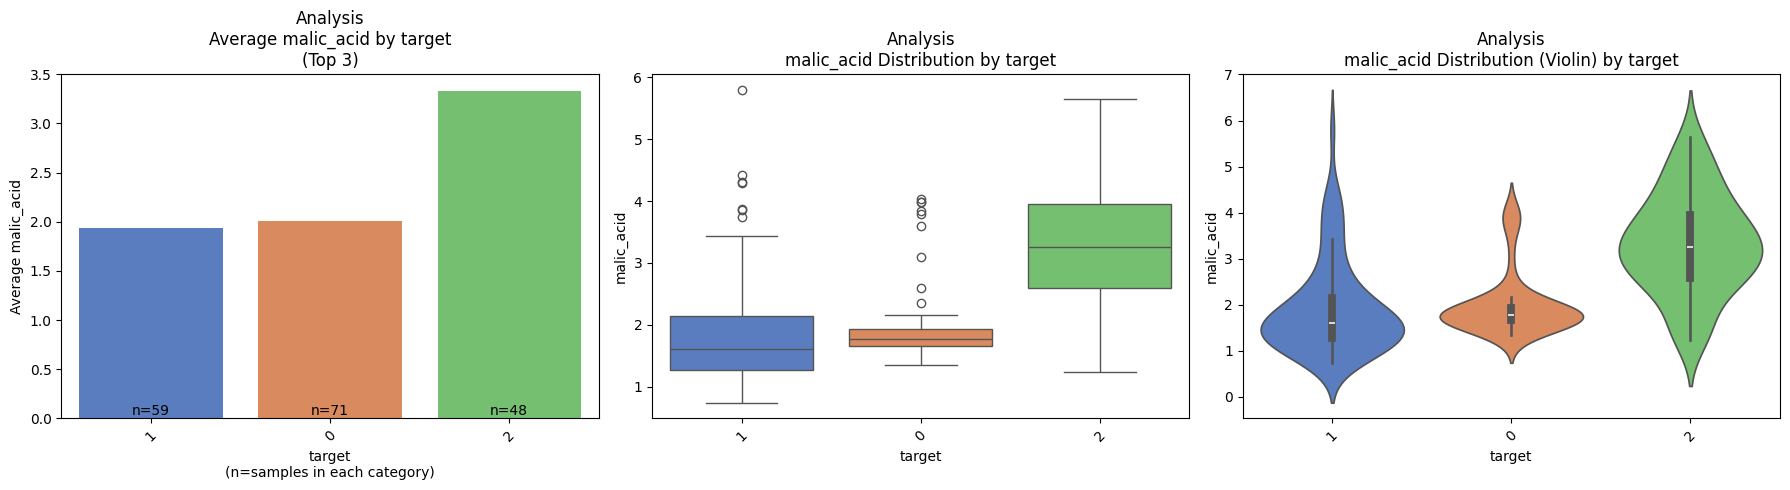

C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value.index, y='mean', data=avg_value, order=category_order, palette=palette)
C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y=target_column, data=filtered_data,
C:\Users\singk\AppData\Local\Temp\ipykernel_13448\2766813466.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y=target_column, data=filtered_data,


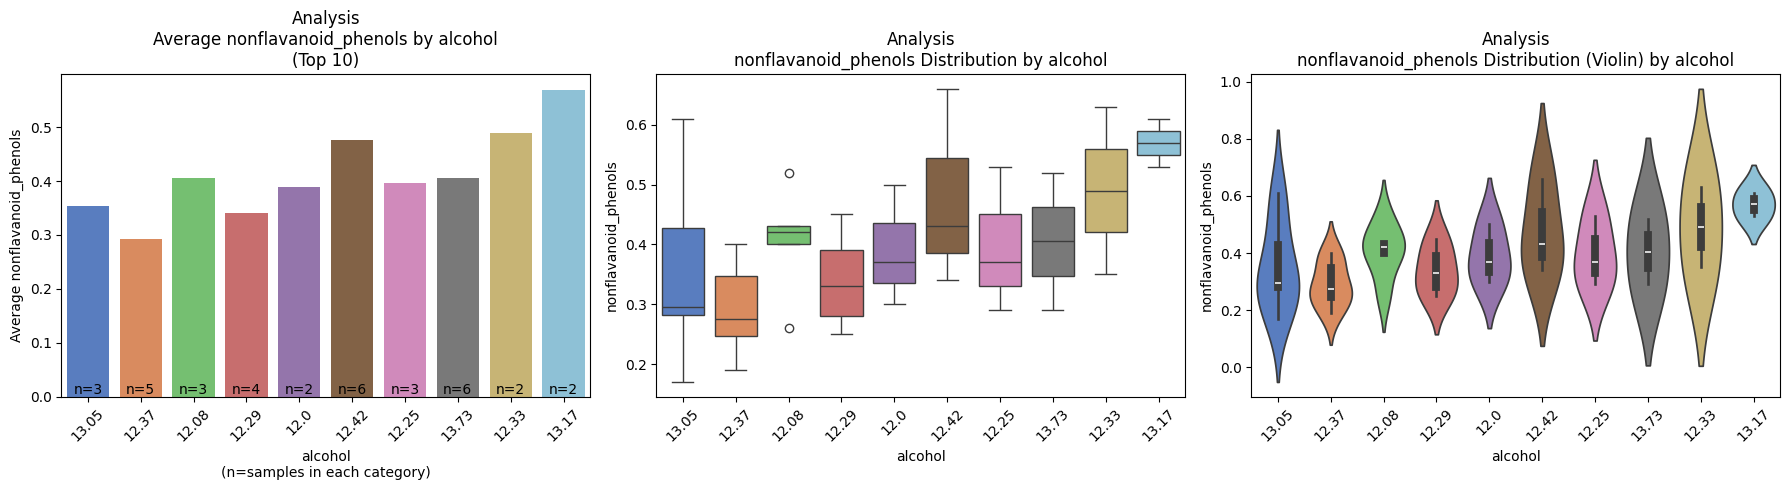

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union
import numpy as np

def plot_categorical_relationships_improved(
    column_name: str='', 
    data: pd.DataFrame = df,  
    target_column: str='', 
    top_n: int = 10, 
    title_prefix: str = 'Analysis', 
    figsize: tuple = (18, 5), 
    palette: str = 'muted', 
    rotation: int = 45, 
    min_count: int = 1
) -> None:

    # Input validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")
    
    # Filter categories with minimum count
    value_counts = data[column_name].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index
    
    # Handle case when no categories meet criteria
    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return
    
    # Filter data
    filtered_data = data[data[column_name].isin(valid_categories)].copy()
    
    # Sort categories by frequency
    category_order = filtered_data[column_name].value_counts().index
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_value = filtered_data.groupby(column_name)[target_column].agg(['mean', 'count'])
    sns.barplot(x=avg_value.index, y='mean', data=avg_value, order=category_order, palette=palette)
    plt.title(f'{title_prefix}\nAverage {target_column} by {column_name}\n(Top {len(valid_categories)})')
    plt.xlabel(f'{column_name}\n(n=samples in each category)')
    plt.ylabel(f'Average {target_column}')
    plt.xticks(rotation=rotation)
    
    # Add sample size annotations
    for i, count in enumerate(avg_value['count']):
        plt.text(i, 0, f'n={count}', ha='center', va='bottom')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y=target_column, data=filtered_data, 
                order=category_order, palette=palette)
    plt.title(f'{title_prefix}\n{target_column} Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel(target_column)
    plt.xticks(rotation=rotation)
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y=target_column, data=filtered_data,order=category_order, palette=palette)
    plt.title(f'{title_prefix}\n{target_column} Distribution (Violin) by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel(target_column)
    plt.xticks(rotation=rotation)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_relationships_improved('target', target_column='malic_acid')
plot_categorical_relationships_improved('alcohol', target_column='nonflavanoid_phenols')


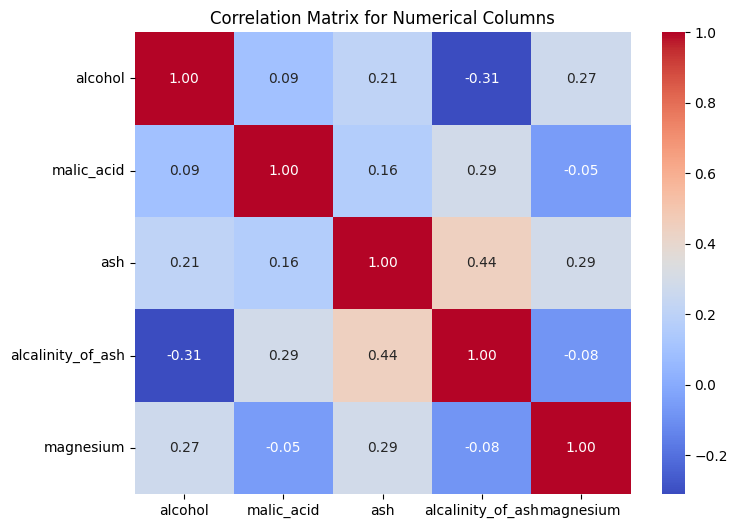

In [10]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

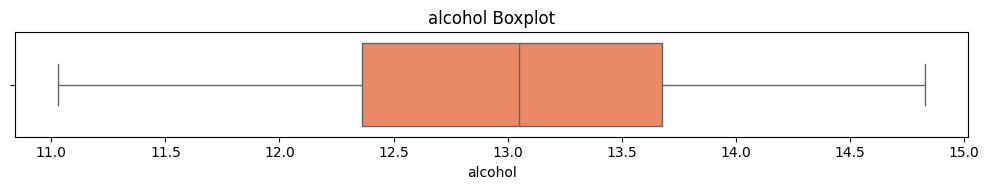


Summary Statistics for alcohol:
 count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64


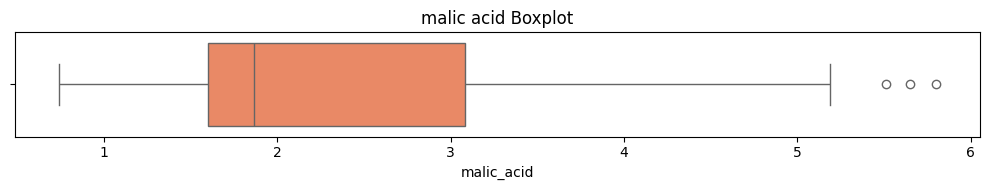


Summary Statistics for malic acid:
 count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64


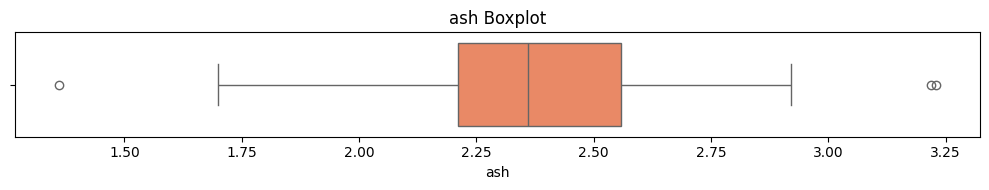


Summary Statistics for ash:
 count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64


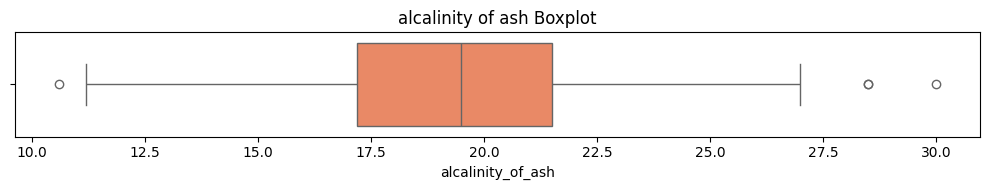


Summary Statistics for alcalinity of ash:
 count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: alcalinity_of_ash, dtype: float64


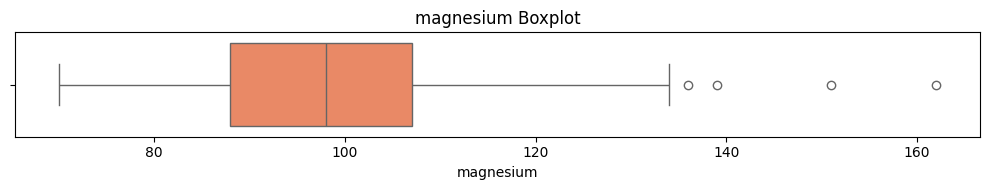


Summary Statistics for magnesium:
 count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64


In [9]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Create a boxplot with the specified color
    sns.boxplot(x=data[column], color='coral')  
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics for the specified column
    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))

In [29]:
wine_df = wine_df.dropna()
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [30]:
X = wine_df.drop(columns=['target'])
y = wine_df['target']

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random.randint(0, 100))

In [33]:
kmeans = KMeans(n_clusters=3, random_state=random.randint(0, 100))
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\singk\AppData\Local\Temp\ipykernel_14432\2938632515.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


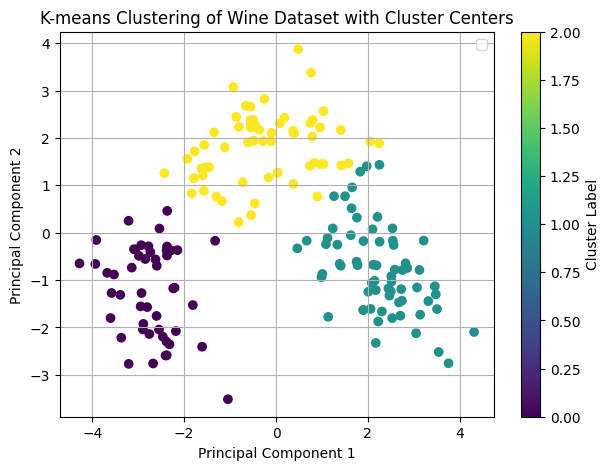

In [35]:
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-means Clustering of Wine Dataset with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
X_train = np.array([[14.23	,1.71	,2.43,	15.6	,127.0	,2.80	,3.06,	0.28,	2.29,	5.64	,1.04	,3.92	,165.0],
                    [12.4, 1.97, 2.0, 12.0, 120.0, 2.8, 3.08, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]])


In [37]:
X_train_scaled = scaler.transform(X_train)

C:\Users\singk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
y_kmeans_new = kmeans.predict(X_train_scaled)
print("Predicted cluster labels for new data:", y_kmeans_new)

Predicted cluster labels for new data: [1 1]
